# SCIKIT-LEARN

- Scikit-Learn é provavelmente a biblioteca mais poderosa para Machine Learning do Python.


- É usado com Numpy, Scipy e MatplotLib, permitindo a criação de ferramentas eficientes para Machine Learning e modelagem estatística como classificação, regressão, cluestering e redução de dimensionalidade.


- É usado para criar modelos e não para leitura, manipulação e sumarização de dados.


- Existem bibliotecas específicas para isso (NumPy, Pandas, ...)


- Contém ferramentas simples e eficientes para a mineração de dados e análise de dados. Ele implementa uma ampla variedade de algoritmos e processos de aprendizagem de máquina para realizar análises avançadas;


- Em geral, um problema de aprendizagem considera um conjunto de amostras de dados e, em seguida, tenta prever propriedades de dados desconhecidos.


- Os problemas de aprendizagem de máquina são dividios em duas categorias:


  - Aprendizagem Supervisionada
    - Classificação
    - Regressão
    
    
  - Aprendizagem Não-Supervisionada
  

## Prevendo o preço da pizza

Suponha que você queira prever o preço da pizza. Para isso vamos criar um modelo de regressão linear, baseado em um atributo da pizza que podemos observar. Vamos modelar a relação entre o tamanho (diâmetro) de uma pizza e seu preço. Escreveremos então um programa com Scikit Learn, que prevê o preço da pizza dado seu tamanho.

In [1]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Vamos supor que você registrou o tamanho e o preço de pizzas que você e sua família comeram nas últimas semanas

# Diâmetro (cm)
Diametros = [[7], [10], [15], [30], [45]]

# Preços (R$)
Precos = [[8], [11], [16], [38.5], [52]]

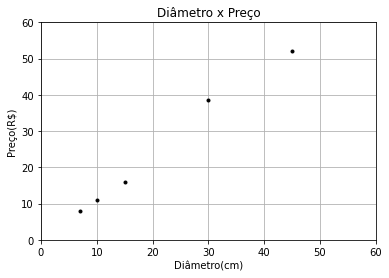

In [3]:
# Visualizar os dados em um gráfico
plt.figure()
plt.xlabel('Diâmetro(cm)')
plt.ylabel('Preço(R$)')
plt.title('Diâmetro x Preço')
plt.plot(Diametros, Precos, 'k.')
plt.axis([0, 60, 0, 60])
plt.grid(True)
plt.show()

In [4]:
# Pelo gráfico podemos ver que existe uma relação positiva entre o diâmetro da pizza e seu preço.
# Isto é, à medida que o diâmetro da pizza aumenta, mais elevado é seu preço.

A classe sklearn.linear_model.LinearRegression é um estimador. Um estimador prevê um valor baseado em dados observados. Em scikit-learn todos os estimadores implementam os métodos fit() e predict(). O método fit é usado para aprender os parâmetros de um modelo e o método predict() é usado para prever o valor de uma variável dependente em relação a uma variável explanatória usando parâmetros aprendidos.

In [5]:
# Importando o módulo de regressão linear do scikit-learn
from sklearn.linear_model import LinearRegression

In [6]:
# Preparando os dados de treino

# Vamos chamar de X os dados de diâmetro da pizza
X = [[7], [10], [15], [30], [45]]

# Vamos chamar de Y os dados de preço da pizza
Y = [[8], [11], [16], [38.5], [52]]

In [7]:
# Criando o modelo
modelo = LinearRegression()

In [8]:
type(modelo)

sklearn.linear_model._base.LinearRegression

In [9]:
# Treinando o modelo
modelo.fit(X,Y)

LinearRegression()

In [10]:
# Prevendo o preço de uma pizza de 20 cm de diâmetro

print("Uma pizza de 20 cm de diâmetro deve custar: R$%.2f" % modelo.predict([[20]]))

Uma pizza de 20 cm de diâmetro deve custar: R$23.41


In [11]:
# Criando um scatter plot

# Coeficientes
print('Coeficiente: \n', modelo.coef_)

# MSE (mean square error)
print("MSE: %.2f" % np.mean((modelo.predict(X) - Y) ** 2))

# Score de variação: 1 representa predição perfeita
print('Score de variação: %.2f' % modelo.score(X, Y))

Coeficiente: 
 [[1.20422117]]
MSE: 2.74
Score de variação: 0.99


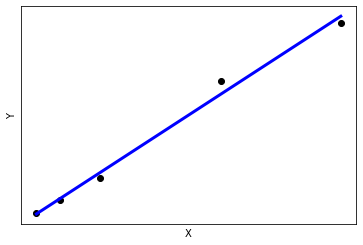

In [12]:
# Scatter Plot representando a regressão linear
plt.scatter(X, Y,  color = 'black')
plt.plot(X, modelo.predict(X), color = 'blue', linewidth = 3)
plt.xlabel('X')
plt.ylabel('Y')
plt.xticks(())
plt.yticks(())

plt.show()

## Prevendo o preço de casas

In [13]:
# Importando os módulos necessários
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [14]:
# O dataset boston já está disponível no scikit-learn. Precisamos apenas carregá-lo.
from sklearn.datasets import load_boston
boston = load_boston()

C:\Users\Libania\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset

In [15]:
# Verificando o tipo da variável boston
type(boston)

sklearn.utils.Bunch

In [16]:
# Visualizando o shape do dataset, neste caso 506 instâncias (linhas) e 13 atributos (colunas)
boston.data.shape

(506, 13)

In [17]:
# Descrição do Dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [18]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [19]:
# Convertendo o dataset em um DataFrame pandas
df = pd.DataFrame(boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [20]:
# Convertendo o título das colunas
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [21]:
# boston.target é uma array com o preço das casas 
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [22]:
# Adicionando o preço da casa ao DataFrame
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


##### Prevendo o Preço das Casas em Boston
- Y - variável dependente (preço das casas em Boston)
- X - variáveis independentes ou explanatórias (todas as outras caracterísricas da casa)

In [27]:
# Importando o módulo de regressão linear 
from sklearn.linear_model import LinearRegression

In [28]:
# Não queremos o preço da casa como variável dependente
X = df.drop('PRICE', axis = 1)

In [29]:
# Definindo Y
Y = df.PRICE

Text(0.5, 1.0, 'Relação entre número de quartos e preço')

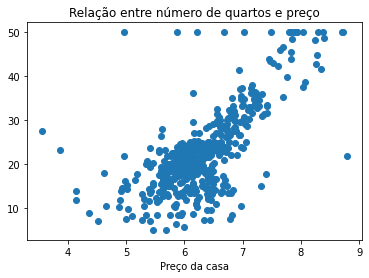

In [30]:
plt.scatter(df.RM, Y)
plt.xlabel("Média do número de quartos por casa")
plt.xlabel("Preço da casa")
plt.title("Relação entre número de quartos e preço")

In [31]:
# Criando o objeto de regressão linear
regr = LinearRegression()

In [32]:
# Tipo do objeto
type(regr)

sklearn.linear_model._base.LinearRegression

In [33]:
# Treinando o modelo
regr.fit(X, Y)

LinearRegression()

In [34]:
# Coeficientes
print("Coeficiente: ", regr.intercept_)
print("Número de coeficientes: ", len(regr.coef_))

Coeficiente:  36.45948838508987
Número de coeficientes:  13


In [35]:
# Prevendo o preço da casa
regr.predict(X)

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211,
       18.99949651, 21.58679568, 20.90652153, 19.55290281, 19.28348205,
       19.29748321, 20.52750979, 16.91140135, 16.17801106, 18.40613603,
       12.52385753, 17.67103669, 15.83288129, 13.80628535, 15.67833832,
       13.38668561, 15.46397655, 14.70847428, 19.54737285, 20.8764282 ,
       11.45511759, 18.05923295,  8.81105736, 14.28275814, 13.70675891,
       23.81463526, 22.34193708, 23.10891142, 22.91502612, 31.35762569,
       34.21510225, 28.02056414, 25.20386628, 24.60979273, 22.94149176,
       22.09669817, 20.42320032, 18.03655088,  9.10655377, 17.20607751,
       21.28152535, 23.97222285, 27.6558508 , 24.04901809, 15.3618477 ,
       31.15264947, 24.85686978, 33.10919806, 21.77537987, 21.08493555,
       17.8725804 , 18.51110208, 23.98742856, 22.55408869, 23.37308644,
       30.36148358, 25.53056512, 21.11338564, 17.42153786, 20.78

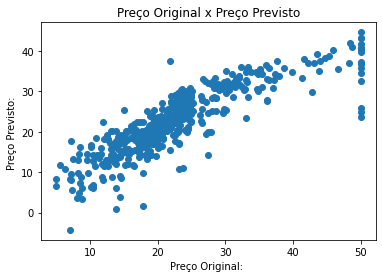

In [36]:
# Comparando os preços originais x preços previstos
plt.scatter(df.PRICE, regr.predict(X))
plt.xlabel("Preço Original: ")
plt.ylabel("Preço Previsto: ")
plt.title("Preço Original x Preço Previsto")
plt.show()

##### Podemos ver que existem alguns erros na predição do preço das casas.

In [37]:
# Vamos calcular o MSE (Mean Squared Error)
mse1 = np.mean((df.PRICE - regr.predict(X)) ** 2)
print(mse1)

21.894831181729227


In [38]:
# Aplicando regressão linear para apenas uma variavel e calculando o MSE
regr = LinearRegression()
regr.fit(X[['PTRATIO']], df.PRICE)
mse2 = np.mean((df.PRICE - regr.predict(X[['PTRATIO']])) ** 2)
print(mse2)

62.65220001376924


##### O MSE aumentou, indicando que um único preditor não é um bom preditorpara o preço das casas.

##### Na prática, você não vai implementar regressão linear em todo o dataset. Você vai dividir o dataset em datasets de treino e teste. Assim, você treina seu modelo nos dados de teste e depois verifica como o modelo se comporta nos seus dados de teste.

In [39]:
# Dividindo X em dados de treino e de teste
X_treino = X[:-50]
X_teste = X[-50:]

# Dividindo Y em dados de treino e de teste
Y_treino = df.PRICE[:-50]
Y_teste = df.PRICE[-50:]

# Imprimindo o shape dos datasets
print(X_treino.shape, X_teste.shape, Y_treino.shape, Y_teste.shape)

(456, 13) (50, 13) (456,) (50,)


##### Podemos criar nossos datasets de treino de forma manual, mas claro este não é o método correto. Vamos então dividir  os datasets randomicamente. O Scikit-Learn provê uma função chamada train_test_split() para isso.

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
# Dividindo X e Y em dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, df.PRICE, test_size = 0.33, random_state = 5)

In [42]:
# Imprimindo o shape dos datasets
print(X_treino.shape, Y_teste.shape, Y_treino.shape, Y_teste.shape)

(339, 13) (167,) (339,) (167,)


In [43]:
# Construindo um modelo de regressão
regr = LinearRegression()

In [44]:
# Treinando o modelo
regr.fit(X_treino, Y_treino)

LinearRegression()

In [45]:
# Definindo os dados de treino e de teste
pred_treino = regr.predict(X_treino)
pred_teste = regr.predict(X_teste)

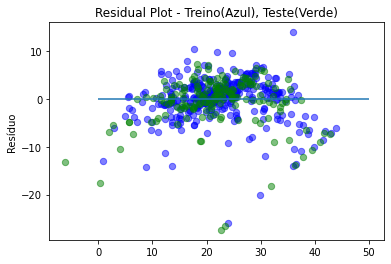

In [46]:
# Comparando preços originais x preços previstos
plt.scatter(regr.predict(X_treino), regr.predict(X_treino) - Y_treino, c = 'b', s = 40, alpha = 0.5)
plt.scatter(regr.predict(X_teste), regr.predict(X_teste) - Y_teste, c = 'g', s = 40, alpha = 0.5)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.ylabel("Resíduo")
plt.title("Residual Plot - Treino(Azul), Teste(Verde)")
plt.show()

## FIM